# Visualisation

In [1]:
import sys
import os

# Détection automatique de la racine du projet
# On remonte d'un niveau depuis le dossier 'notebooks'
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Ajout au path pour pouvoir faire "from src..."
if project_root not in sys.path:
    sys.path.append(project_root)

# Définition des chemins absolus
DATA_RAW = os.path.join(project_root, "data", "raw")
DATA_PROCESSED = os.path.join(project_root, "data", "processed")
GEO_PATH = os.path.join(project_root, "geo")

print(f"Système configuré. Racine : {project_root}")

Système configuré. Racine : c:\Users\valen\OneDrive\Documents\GitHub\Projet-de-Statapp---WFP-


## Check up

In [ ]:
import pandas as pd

# 1. Chargement du fichier propre
df = pd.read_parquet("../data/processed/NIGERIA_FINAL_FULL.parquet")

# 2. Affichage simple de la liste
print("📋 LISTE DES COLONNES :")
print(df.columns.tolist())

# 3. Affichage avec les types (pour vérifier que 'date' est bien datetime et 'Rainfall' float)
print("\nℹ DÉTAILS TECHNIQUES :")
df.info()

# 4. Aperçu visuel
print("\n👀 APERÇU :")
display(df.head(3))

📋 LISTE DES COLONNES :
['admin2', 'date', 'Evap_tavg', 'LWdown_f_tavg', 'Lwnet_tavg', 'Psurf_f_tavg', 'Qair_f_tavg', 'Qg_tavg', 'Qh_tavg', 'Qle_tavg', 'Qs_tavg', 'Qsb_tavg', 'RadT_tavg', 'Rainf_f_tavg', 'SWE_inst', 'SWdown_f_tavg', 'SnowCover_inst', 'SnowDepth_inst', 'Snowf_tavg', 'Swnet_tavg', 'Tair_f_tavg', 'Wind_f_tavg', 'SoilMoi00_10cm_tavg', 'SoilMoi10_40cm_tavg', 'SoilMoi40_100cm_tavg', 'SoilMoi100_200cm_tavg', 'SoilTemp00_10cm_tavg', 'SoilTemp10_40cm_tavg', 'SoilTemp40_100cm_tavg', 'SoilTemp100_200cm_tavg', 'phase1', 'phase2', 'phase3', 'phase4', 'phase5', 'population', 'phase35']

ℹ️ DÉTAILS TECHNIQUES :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43440 entries, 0 to 43439
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   admin2                  43440 non-null  object        
 1   date                    43440 non-null  datetime64[ns]
 2   Evap_tavg               43

,admin2,date,Evap_tavg,LWdown_f_tavg,Lwnet_tavg,Psurf_f_tavg,Qair_f_tavg,Qg_tavg,Qh_tavg,Qle_tavg,...,SoilTemp10_40cm_tavg,SoilTemp40_100cm_tavg,SoilTemp100_200cm_tavg,phase1,phase2,phase3,phase4,phase5,population,phase35
0,AbaSouth,2020-01-01,0.000029,383.5031,-70.028404,100462.58,0.012456,1.073294,37.359870,73.344410,...,299.40295,299.13416,298.86070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AbaSouth,2020-02-01,0.000009,397.5511,-73.352710,100404.08,0.014947,3.735431,60.410984,22.267885,...,301.30142,300.37408,299.49460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AbaSouth,2020-03-01,0.000029,415.2984,-45.273190,100361.08,0.018468,-0.786765,9.271555,72.505660,...,300.89066,300.84122,300.38528,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Config
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 1. Chargement
df = pd.read_parquet("../data/processed/NIGERIA_FINAL_FULL.parquet")

# 2. Création de la target en Pourcentage
# On utilise 'phase35' (Crise + Urgence + Famine) et 'population'
# Pandas gère les NaN automatiquement : si phase35 est vide, le résultat sera NaN (c'est ce qu'on veut)
df['target_pct'] = (df['phase35'] / df['population']) * 100

print("Variable 'target_pct' créée.")
display(df[['admin2', 'date', 'Rainf_f_tavg', 'target_pct']].head())

Variable 'target_pct' créée.


,admin2,date,Rainf_f_tavg,target_pct
0,AbaSouth,2020-01-01,0.000007,NaN
1,AbaSouth,2020-02-01,0.000006,NaN
2,AbaSouth,2020-03-01,0.000056,NaN
3,AbaSouth,2020-04-01,0.000060,NaN
4,AbaSouth,2020-05-01,0.000086,NaN


In [1]:
import pandas as pd

# 1. Chargement du dataset avancé
df = pd.read_parquet("../data/processed/NIGERIA_DATASET_MODEL_ADVANCED.parquet")

print(f"Dimensions totales : {df.shape[0]} lignes x {df.shape[1]} colonnes")
print("-" * 60)

# 2. Affichage catégorisé pour y voir clair

# A. Identifiants et Temps
cols_id = [c for c in df.columns if c in ['date', 'admin2', 'month', 'year', 'quarter', 'month_sin', 'month_cos', 'is_lean_season']]
print(f"\n--- IDENTIFIANTS & TEMPS ({len(cols_id)}) ---")
print(cols_id)

# B. Cibles (Targets)
cols_target = [c for c in df.columns if 'target' in c or 'phase35' in c]
print(f"\n--- CIBLES ({len(cols_target)}) ---")
print(cols_target)

# C. Pluie (Rainfall)
cols_rain = [c for c in df.columns if 'Rain' in c]
print(f"\n--- PLUIE ({len(cols_rain)}) ---")
print(cols_rain)

# D. Humidité du Sol (Soil Moisture)
cols_soil = [c for c in df.columns if 'Soil' in c]
print(f"\n--- HUMIDITÉ SOL ({len(cols_soil)}) ---")
print(cols_soil)

# E. Température (Tair)
cols_temp = [c for c in df.columns if 'Tair' in c]
print(f"\n--- TEMPÉRATURE ({len(cols_temp)}) ---")
print(cols_temp)

# F. Autres (Interactions, etc.)
cols_autres = [c for c in df.columns if c not in cols_id + cols_target + cols_rain + cols_soil + cols_temp]
if cols_autres:
    print(f"\n--- AUTRES / ORIGINALES ({len(cols_autres)}) ---")
    # On affiche juste les 10 premières pour ne pas spammer si il reste les colonnes brutes FLDAS
    print(cols_autres[:10])

Dimensions totales : 39096 lignes x 71 colonnes
------------------------------------------------------------

--- IDENTIFIANTS & TEMPS (6) ---
['admin2', 'date', 'month', 'month_sin', 'month_cos', 'is_lean_season']

--- CIBLES (2) ---
['phase35', 'target_pct']

--- PLUIE (11) ---
['Rainf_f_tavg', 'Rainfall_mm', 'Rainfall_mm_roll3m', 'Rainfall_mm_roll6m', 'Rainfall_mm_anomaly', 'Rainfall_mm_lag1', 'Rainfall_mm_anomaly_lag1', 'Rainfall_mm_lag3', 'Rainfall_mm_anomaly_lag3', 'Rainfall_mm_lag6', 'Rainfall_mm_anomaly_lag6']

--- HUMIDITÉ SOL (17) ---
['SoilMoi00_10cm_tavg', 'SoilMoi10_40cm_tavg', 'SoilMoi40_100cm_tavg', 'SoilMoi100_200cm_tavg', 'SoilTemp00_10cm_tavg', 'SoilTemp10_40cm_tavg', 'SoilTemp40_100cm_tavg', 'SoilTemp100_200cm_tavg', 'SoilMoi00_10cm_tavg_roll3m', 'SoilMoi00_10cm_tavg_roll6m', 'SoilMoi00_10cm_tavg_anomaly', 'SoilMoi00_10cm_tavg_lag1', 'SoilMoi00_10cm_tavg_anomaly_lag1', 'SoilMoi00_10cm_tavg_lag3', 'SoilMoi00_10cm_tavg_anomaly_lag3', 'SoilMoi00_10cm_tavg_lag6', 'SoilMo

## Charte graphique

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Chargement
df = pd.read_parquet("../data/processed/NIGERIA_FINAL_FULL.parquet")

# (Rappel conversion si besoin)
if df['Rainf_f_tavg'].mean() < 1:
    df['Rainfall_mm'] = df['Rainf_f_tavg'] * 86400 * 30.4
else:
    df['Rainfall_mm'] = df['Rainf_f_tavg']

df['target_pct'] = (df['phase35'] / df['population']) * 100

# 2. CONFIGURATION ESTHÉTIQUE
sns.set_style("white") # Fond blanc épuré (pas de grille grise moche)
sns.set_context("notebook", font_scale=1.1) # Texte plus lisible

# Palettes de couleurs personnalisées
# Rouge pour le danger (Famine), Bleu pour la pluie, Vert pour la végétation
red_grad = sns.color_palette("Reds_r", 15) 
blue_grad = sns.color_palette("Blues", 15)

## Visualisation

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Chargement & Prépa
df = pd.read_parquet("../data/processed/NIGERIA_FINAL_FULL.parquet")

# Conversion Pluie (si pas déjà fait)
if df['Rainf_f_tavg'].mean() < 1:
    df['Rainfall_mm'] = df['Rainf_f_tavg'] * 86400 * 30.4
else:
    df['Rainfall_mm'] = df['Rainf_f_tavg']

# Target %
df['target_pct'] = (df['phase35'] / df['population']) * 100


Génération du graphique interactif (Zoomable)...


Generation du graphique interactif...



Generation du Top 15 des regions...


C:\Users\valen\AppData\Local\Temp\ipykernel_12056\2647624530.py:68: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




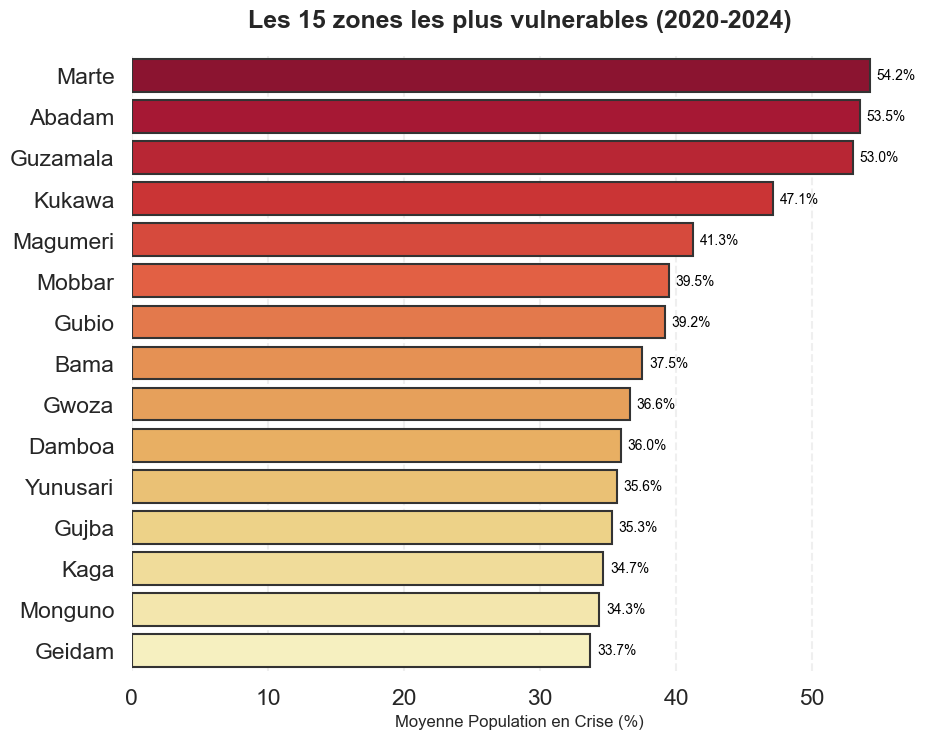


Generation de la Heatmap Saisonniere...


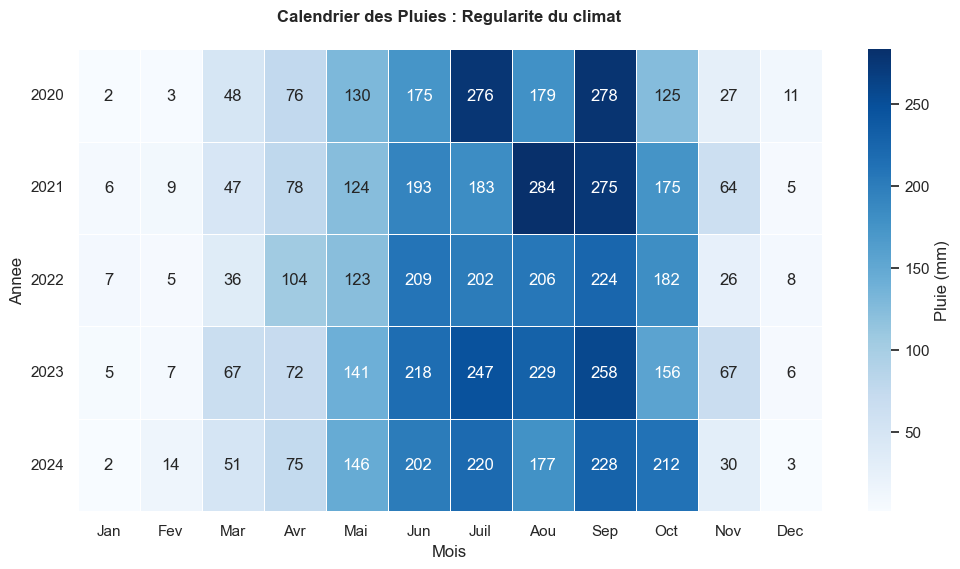

In [25]:



# ==============================================================================
# 1. GRAPHIQUE INTERACTIF (Plotly) - Chronologie
# ==============================================================================
print("Generation du graphique interactif...")

# Agrégation nationale par date
national = df.groupby('date')[['Rainfall_mm', 'target_pct']].mean().reset_index()

# Création du graphique à double axe
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Trace 1 : La Pluie (Zone remplie)
fig.add_trace(
    go.Scatter(
        x=national['date'], 
        y=national['Rainfall_mm'], 
        name="Precipitations",
        fill='tozeroy', 
        line=dict(color='rgba(0, 100, 250, 0.5)', width=1)
    ),
    secondary_y=False,
)

# Trace 2 : L'Insécurité Alimentaire (Ligne Rouge)
fig.add_trace(
    go.Scatter(
        x=national['date'], 
        y=national['target_pct'], 
        name="Insecurite Alim. (Phase 3+)",
        mode='lines+markers',
        connectgaps=True,         # Relie les points malgré les données manquantes
        line=dict(color='#d62728', width=3),
        marker=dict(size=8, symbol='circle')
    ),
    secondary_y=True,
)

# Mise en page épurée
fig.update_layout(
    title_text="<b>Chronologie Climatique et Alimentaire</b><br><span style='font-size:12px;color:grey'>Survolez pour voir les valeurs exactes</span>",
    template="plotly_white",
    hovermode='x unified',
    legend=dict(orientation="h", y=1.1, x=0.5, xanchor="center"),
    height=600
)

# Configuration des axes
fig.update_yaxes(title_text="Pluie (mm/mois)", secondary_y=False, showgrid=False)
fig.update_yaxes(title_text="Population en Crise (%)", secondary_y=True, showgrid=True, gridcolor='lightgrey')

fig.show()


# ==============================================================================
# 2. TOP 15 REGIONS (Seaborn) - Classement
# ==============================================================================
print("\nGeneration du Top 15 des regions...")

# Calcul de la moyenne par région et tri
top15 = df.groupby('admin2')['target_pct'].mean().sort_values(ascending=False).head(15).reset_index()

plt.figure(figsize=(10, 8))
sns.set_theme(style="white", context="talk")

# Palette de couleurs : Jaune vers Rouge foncé
colors = sns.color_palette("YlOrRd_r", n_colors=15)

ax = sns.barplot(x="target_pct", y="admin2", data=top15, palette=colors, edgecolor=".2")

# Nettoyage du cadre (Despine)
sns.despine(left=True, bottom=True)
ax.xaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_xlabel("Moyenne Population en Crise (%)", fontsize=12)
ax.set_ylabel("")
ax.set_title("Les 15 zones les plus vulnerables (2020-2024)", fontweight='bold', pad=20)

# Affichage des valeurs numériques
for i, v in enumerate(top15["target_pct"]):
    ax.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=10, color='black')

plt.show()


# ==============================================================================
# 3. SAISONNALITE (Heatmap) - Calendrier
# ==============================================================================
print("\nGeneration de la Heatmap Saisonniere...")

# Préparation de la table pivot (Année x Mois) pour la pluie
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
pivot_rain = df.groupby(['year', 'month'])['Rainfall_mm'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.set_theme(style="white")

# Création de la heatmap
ax = sns.heatmap(pivot_rain, cmap="Blues", annot=True, fmt=".0f", linewidths=.5, cbar_kws={'label': 'Pluie (mm)'})

plt.title("Calendrier des Pluies : Regularite du climat", fontweight='bold', pad=20)
plt.xlabel("Mois")
plt.ylabel("Annee")
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Avr', 'Mai', 'Jun', 'Juil', 'Aou', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(rotation=0)

plt.show()

Generation du Violin Plot (Evolution Annuelle)...


C:\Users\valen\AppData\Local\Temp\ipykernel_12056\3548073930.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




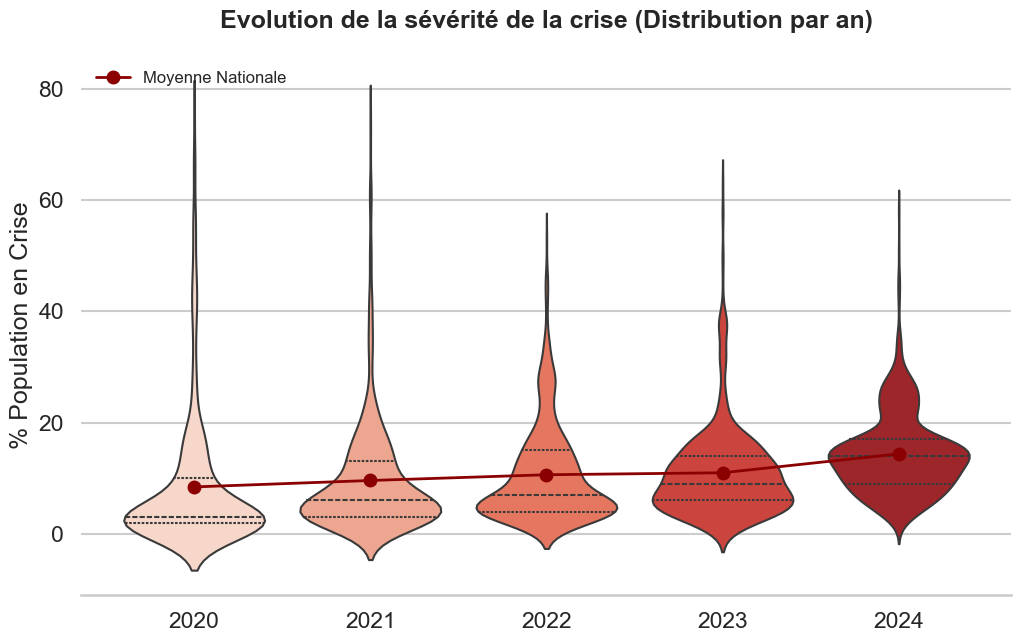

In [26]:


# ==============================================================================
# 4. EVOLUTION ANNUELLE (Violin Plot)
# ==============================================================================
# Ce graphique montre si la crise devient plus grave ou plus dispersée au fil des ans.
print("Generation du Violin Plot (Evolution Annuelle)...")

plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid", context="talk")

# Violin plot : Montre la densité de la distribution (la forme) + la médiane (point blanc)
ax = sns.violinplot(
    x="year", 
    y="target_pct", 
    data=df, 
    palette="Reds", 
    inner="quartile",  # Affiche les quartiles (25%, 50%, 75%)
    linewidth=1.5
)

sns.despine(left=True)
ax.set_title("Evolution de la sévérité de la crise (Distribution par an)", fontweight='bold', pad=20)
ax.set_ylabel("% Population en Crise")
ax.set_xlabel("")

# Ajout de la moyenne annuelle par un point rouge
means = df.groupby('year')['target_pct'].mean()
plt.plot(range(len(means)), means, 'o-', color='darkred', label='Moyenne Nationale', linewidth=2)
plt.legend(loc='upper left', frameon=False, fontsize=12)

plt.show()


In [27]:

# ==============================================================================
# 5. RELATION PLUIE vs FAIM (Scatter Plot Interactif)
# ==============================================================================
# Permet d'identifier les "anomalies" : régions avec beaucoup de pluie mais beaucoup de faim.
print("\nGeneration du Scatter Plot Interactif...")

# On filtre les données vides pour le graph
subset = df.dropna(subset=['target_pct', 'Rainfall_mm'])

fig = px.scatter(
    subset, 
    x="Rainfall_mm", 
    y="target_pct", 
    color="year",                 # Couleur par année pour voir l'évolution
    hover_name="admin2",          # Affiche le nom de la région au survol
    size="population",            # La taille du point dépend de la population totale
    size_max=40,
    opacity=0.6,
    color_continuous_scale="RdBu_r", # Rouge = Récent/Grave, Bleu = Ancien (ou inverse selon échelle)
    title="<b>Corrélation : Pluie vs Insécurité Alimentaire</b><br><span style='font-size:12px;color:grey'>Chaque bulle est une région à un instant T. Taille = Population.</span>"
)

fig.update_layout(
    template="plotly_white", 
    height=600,
    xaxis_title="Précipitations (mm/mois)",
    yaxis_title="Population en Crise (%)"
)
fig.show()



Generation du Scatter Plot Interactif...



Generation du Focus Regional (Top 4)...


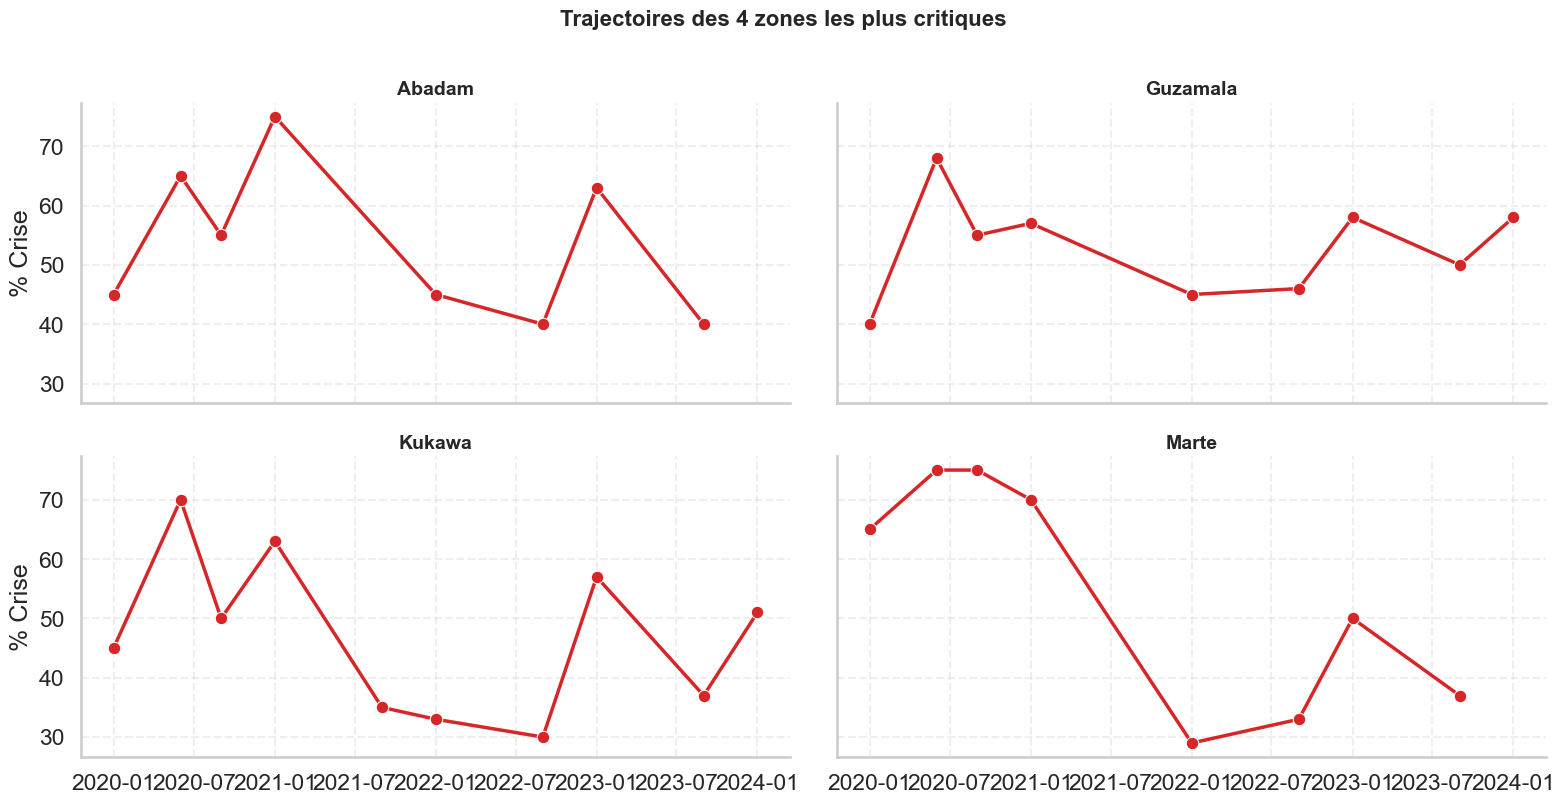

In [28]:

# ==============================================================================
# 6. FOCUS : LES 4 PIRES REGIONS (Small Multiples)
# ==============================================================================
# Comparaison directe des trajectoires des régions les plus touchées.
print("\nGeneration du Focus Regional (Top 4)...")

# Identification du Top 4
top4_names = df.groupby('admin2')['target_pct'].mean().sort_values(ascending=False).head(4).index
subset_top4 = df[df['admin2'].isin(top4_names)].sort_values(['admin2', 'date'])

# Graphique à facettes (Une courbe par région)
g = sns.FacetGrid(
    subset_top4, 
    col="admin2", 
    col_wrap=2,     # 2 graphiques par ligne
    height=4, 
    aspect=2, 
    sharey=True     # Même échelle Y pour comparer
)

# On trace la ligne rouge pour la faim
g.map(sns.lineplot, "date", "target_pct", color="#d62728", linewidth=2.5, marker="o")

# On ajoute une zone bleue pour la pluie en arrière-plan (sur un axe secondaire fictif pour le contexte)
# (C'est plus complexe avec FacetGrid, donc on reste simple ici pour la lisibilité)

# Titres et labels
g.set_titles("{col_name}", fontweight='bold', size=14)
g.set_axis_labels("", "% Crise")
g.fig.suptitle("Trajectoires des 4 zones les plus critiques", fontweight='bold', fontsize=16, y=1.05)

# Rotation des dates pour lisibilité
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=0)
    ax.grid(True, linestyle='--', alpha=0.3)

plt.show()

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Config
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Chargement du dataset Phase 1
df = pd.read_parquet("../data/processed/NIGERIA_FINAL_FULL.parquet")

# 2. Préparation des variables (Conversion et Renommage)
# Pluie : Conversion Flux -> mm/mois
if df['Rainf_f_tavg'].mean() < 1:
    df['Rainfall_mm'] = df['Rainf_f_tavg'] * 86400 * 30.4
else:
    df['Rainfall_mm'] = df['Rainf_f_tavg']

# Cible : % Population
df['target_pct'] = (df['phase35'] / df['population']) * 100

# Dictionnaire de renommage pour des graphiques propres
cols_map = {
    'Rainfall_mm': 'Pluie (mm)',
    'SoilMoi00_10cm_tavg': 'Humidite Sol (0-10cm)',
    'Tair_f_tavg': 'Temperature Air (K)',
    'target_pct': 'Famine (%)'
}
df_viz = df.rename(columns=cols_map)


Generation du Cycle Agronomique...


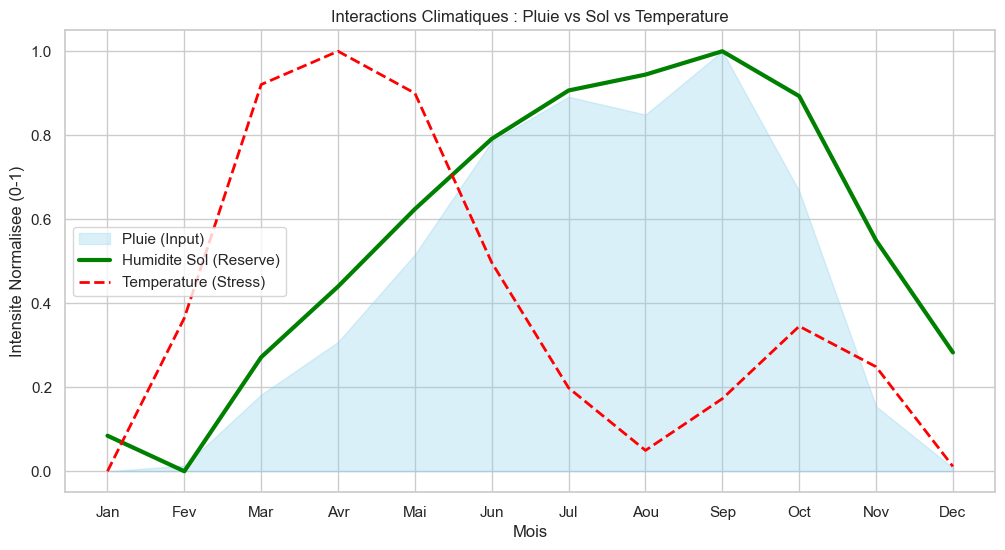

In [3]:

# ==============================================================================
# LE CYCLE AGRONOMIQUE (Comparaison Normalisée)
# ==============================================================================
# Objectif : Voir si le pic de température arrive avant la pluie (Stress)
# et si le sol reste humide après la pluie (Réserve).

print("Generation du Cycle Agronomique...")
df_viz['month'] = df_viz['date'].dt.month
seasonality = df_viz.groupby('month')[['Pluie (mm)', 'Humidite Sol (0-10cm)', 'Temperature Air (K)']].mean()

# Normalisation Min-Max (0 à 1) pour superposer les courbes
scaler = MinMaxScaler()
seasonality_scaled = pd.DataFrame(
    scaler.fit_transform(seasonality), 
    columns=seasonality.columns, 
    index=seasonality.index
)

plt.figure(figsize=(12, 6))

# Pluie (Zone bleue)
plt.fill_between(seasonality_scaled.index, seasonality_scaled['Pluie (mm)'], color='skyblue', alpha=0.3, label='Pluie (Input)')

# Humidité Sol (Ligne Verte)
plt.plot(seasonality_scaled.index, seasonality_scaled['Humidite Sol (0-10cm)'], color='green', linewidth=3, label='Humidite Sol (Reserve)')

# Température (Ligne Rouge)
plt.plot(seasonality_scaled.index, seasonality_scaled['Temperature Air (K)'], color='red', linewidth=2, linestyle='--', label='Temperature (Stress)')

plt.title('Interactions Climatiques : Pluie vs Sol vs Temperature')
plt.xlabel('Mois')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Avr', 'Mai', 'Jun', 'Jul', 'Aou', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Intensite Normalisee (0-1)')
plt.legend()
plt.show()




Generation de la Carte de Danger...
Graphique généré sur 3871 points.


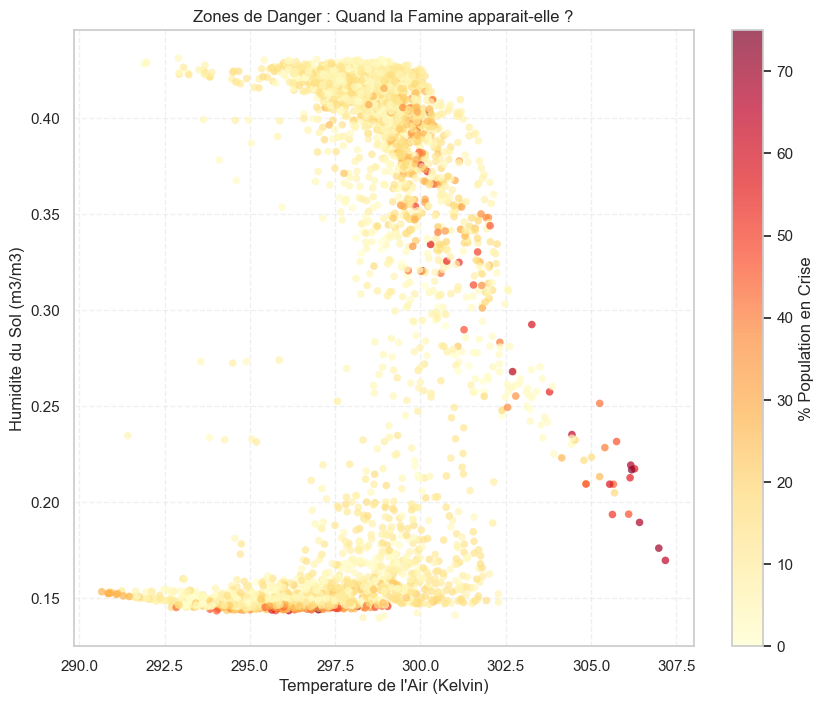

In [5]:
# ==============================================================================
# VISUALISATION 2 : LA CARTE DE DANGER (Stress Thermique)
# ==============================================================================
print("\nGeneration de la Carte de Danger...")

# 1. On nettoie d'abord les lignes sans données de famine
df_clean = df_viz.dropna(subset=['Famine (%)'])

# 2. Échantillonnage intelligent (Maximum 5000, ou tout si moins)
n_samples = min(5000, len(df_clean))
subset = df_clean.sample(n=n_samples, random_state=42)

print(f"Graphique généré sur {len(subset)} points.")

plt.figure(figsize=(10, 8))
points = plt.scatter(
    x=subset['Temperature Air (K)'], 
    y=subset['Humidite Sol (0-10cm)'], 
    c=subset['Famine (%)'], 
    cmap='YlOrRd', # Jaune = Calme, Rouge = Crise
    s=30,          # Points un peu plus gros pour mieux voir
    alpha=0.7,
    edgecolors='none'
)

plt.colorbar(points, label='% Population en Crise')
plt.xlabel('Temperature de l\'Air (Kelvin)')
plt.ylabel('Humidite du Sol (m3/m3)')
plt.title('Zones de Danger : Quand la Famine apparait-elle ?')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Calcul des correlations (avec simulation de Lag 3 mois)...


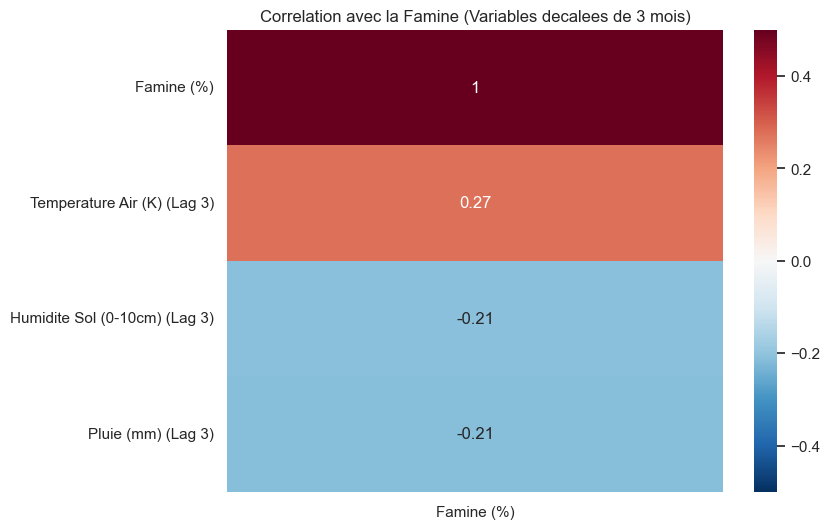

In [6]:
# ==============================================================================
# VISUALISATION 3 : POTENTIEL PRÉDICTIF (Corrélation avec Lag simulé)
# ==============================================================================
# Objectif : Vérifier si le Sol prédit mieux que la Pluie avec 3 mois d'avance.

print("\nCalcul des correlations (avec simulation de Lag 3 mois)...")

# On crée des lags temporaires juste pour ce calcul
vars_clim = ['Pluie (mm)', 'Humidite Sol (0-10cm)', 'Temperature Air (K)']
df_corr = df_viz[['admin2', 'date', 'Famine (%)'] + vars_clim].copy()

# On trie pour que le shift fonctionne
df_corr = df_corr.sort_values(['admin2', 'date'])

for col in vars_clim:
    df_corr[f'{col} (Lag 3)'] = df_corr.groupby('admin2')[col].shift(3)

# Calcul de la matrice de corrélation
corr_cols = ['Famine (%)'] + [f'{c} (Lag 3)' for c in vars_clim]
corr_matrix = df_corr[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix[['Famine (%)']].sort_values(by='Famine (%)', ascending=False),
    annot=True, 
    cmap='RdBu_r', 
    center=0,
    vmin=-0.5, vmax=0.5
)
plt.title('Correlation avec la Famine (Variables decalees de 3 mois)')
plt.show()

In [9]:
# On reprend le calcul de corrélation
vars_clim = ['Pluie (mm)', 'Humidite Sol (0-10cm)', 'Temperature Air (K)']

# On garde 'admin2' juste pour faire le calcul du shift (groupby), mais on ne l'utilisera pas pour la corrélation
df_corr = df_viz[['admin2', 'date', 'Famine (%)'] + vars_clim].copy()

# On recrée les lags
for col in vars_clim:
    df_corr[f'{col} (Lag 3)'] = df_corr.groupby('admin2')[col].shift(3)

# CORRECTION ICI : On ajoute numeric_only=True pour ignorer 'admin2' et 'date'
correlations = df_corr.corr(numeric_only=True)['Famine (%)'].sort_values()

print("--- CORRÉLATIONS AVEC LA FAMINE (Plus c'est bas/négatif, mieux c'est) ---")
print(correlations[[f'{c} (Lag 3)' for c in vars_clim]])

--- CORRÉLATIONS AVEC LA FAMINE (Plus c'est bas/négatif, mieux c'est) ---
Pluie (mm) (Lag 3)              -0.212056
Humidite Sol (0-10cm) (Lag 3)   -0.209537
Temperature Air (K) (Lag 3)      0.274867
Name: Famine (%), dtype: float64


# Feature Selection Analysis: Climate Variables

We investigated the predictive power of different climate indicators with a **3-month lag** to validate their inclusion in the model.

**Key Findings:**

1.  **Air Temperature (`Tair_f_tavg`) is the strongest predictor (+0.27)**
    * It shows the highest correlation magnitude.
    * **Interpretation:** Higher temperatures significantly increase food insecurity risks, likely due to heat stress on crops and increased evapotranspiration. This confirms that temperature is a critical "stress multiplier" in the Sahel.

2.  **Rainfall vs. Soil Moisture (Tie at ~ -0.21)**
    * Contrary to the initial hypothesis, Soil Moisture (`-0.209`) did not significantly outperform raw Rainfall (`-0.212`) at the monthly aggregation level.
    * **Interpretation:** The strong similarity suggests that soil saturation tracks rainfall very closely in this region (possibly due to soil composition or rapid drainage).

**Conclusion:**
We will retain **all three variables** for the Feature Engineering phase. While Rainfall and Soil Moisture provide similar signals regarding water availability, **Temperature provides unique and critical information** regarding environmental stress.